# Topic : ML 分類 2 class (線性)
* follow CRISP-DM


## Step 1: Load data, import library

In [31]:
import numpy as np


w1= 2 w2= 2 b= 2


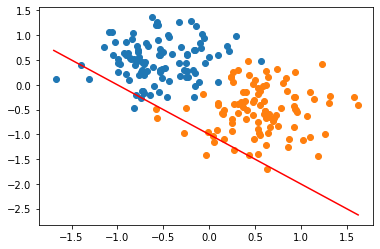

<class 'numpy.ndarray'> [[ 0.19176697  0.77762091]
 [ 0.61306412 -0.51886276]
 [ 0.30964025 -0.38126219]
 [-1.39930311  0.39289525]
 [-0.60449619 -0.01921866]]
<class 'numpy.ndarray'> [0 1 1 0 0]


In [32]:
# step 1: Load data, import library

# =====for deep learning ===============

import torch
import torch.nn as nn

#======== for ML =========================
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# define function
def plotResult(X,y,w1=2, w2=2,b=2):
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])
  xm=np.array([X.min(),X.max()])
  ym=(w1*xm+b)/(-w2)
  plt.plot(xm,ym,'r')
  print("w1=",w1,"w2=",w2,"b=",b)
  plt.show()

def getParameters(model):
  w,b =model.parameters()
  w1=w[0][0].item()
  w2=w[0][1].item()
  b=b[0].item()
  return w1,w2,b

# test 1 generate data ==========================
n_samples=200
centers=[[-0.5,0.5],[0.5,-0.5]]
X,y=datasets.make_blobs(n_samples=n_samples,centers=centers,cluster_std=0.4,random_state=3)
#print(X[0],type(X[0]),X[0].shape)
plotResult(X,y)

# test 2 read from 400pts datasets
# data=pd.read_csv("400pts.csv")
# X=data.iloc[:,:-1].values.reshape(-1,2)
# y=data.iloc[:,-1].values
# print(type(X))



print(type(X),X[:5])
print(type(y),y[:5])

In [33]:
# 練習
# plt.scatter(X[y==0,0],X[y==0,1])
# # plt.show()
# plt.scatter(X[y==1,0],X[y==1,1])
# plt.show()


## Step 2: Preprocessing

In [34]:
#step 2 :  Preprocessing for pytorch
tensor_X=torch.FloatTensor(X)
tensor_y=torch.FloatTensor(y.reshape(200,1))
print(tensor_X.size())

torch.Size([200, 2])


# Step 3: Build Model

[[ 3.58514705 -3.06318302]] [0.07351999]
Logistic regression
w1= 3.5851470491819954 w2= -3.063183024592416 b= 0.0735199880274281


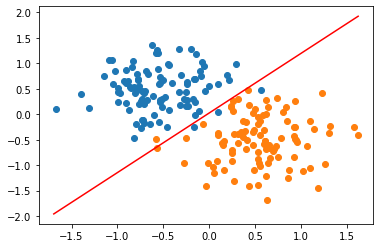

In [35]:
# step 3: 
from sklearn.linear_model import LogisticRegression as LR
model=LR()
model.fit(X,y)
print(model.coef_,model.intercept_)
[[w1,w2]]=model.coef_
[b]=model.intercept_
print('Logistic regression')
plotResult(X,y,w1=w1, w2=w2,b=b)


# step 3: 
# from sklearn.svm import SVC
# model2=SVC(kernel="linear")
# print(model2.get_params())
# model2.fit(X,y)
# print(model2.coef_,model.intercept_)
# [[w1,w2]]=model2.coef_
# [b]=model2.intercept_
# print('SVC')
# plotResult(X,y,w1=w1, w2=w2,b=b)




<img src= "https://lh6.googleusercontent.com/pgnVbPBuXCiR5Ri2t0R9xIl4rpuTXWWZ5euvGhegi8DH8H0Lbcu19DwX86f4C5OhexXsOI9V6iIG9mUcAGBw16KgvJqpfYyuHvVLdzKzziSpn73PQJHsmkoU6s0kEWqy5ghZj9w" width=500 />


In [36]:
#step 3: build model

class MyLogRegNN(nn.Module):
  def __init__(self,inSize,outSize):
    super().__init__()
    self.linear=nn.Linear(inSize,outSize)
  def forward(self,x):
      x=self.linear(x)
      y_hat=torch.sigmoid(x)
      return y_hat
  def predict(self,x):
      pred=self.forward(x)
      if pred >=0.5: 
        return 1
      return 0


model=MyLogRegNN(2,1)
print(model)


MyLogRegNN(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [37]:
a=[1,2,3,4,5,6]
a_it=iter(a)
for i in range(6):
  print(next(a_it))

1
2
3
4
5
6


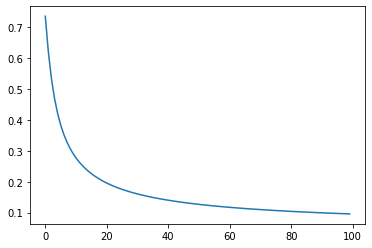

In [38]:
#step 4 training
criterion=nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.8)
epochs=100
losses=[]
for e in range(epochs):
  #compute loss
  y_hat=model(tensor_X)
  loss_=criterion(y_hat,tensor_y).detach().numpy()
  loss=criterion(y_hat,tensor_y)

  losses.append(loss_)
 
  # 3 steps for Gradient update
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


plt.plot(range(epochs),losses)



w1= 3.7205920219421387 w2= -3.2634148597717285 b= 0.0705496296286583


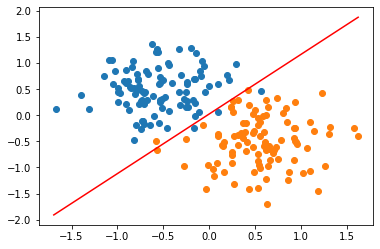

In [39]:
# plot results

w1,w2,b =getParameters(model)
plotResult(X,y,w1,w2,b)